# What Keeps a Restaurant in Business?


*May 2016*

*By Alex Stillman, J.D./M.B.A. Candidate, NYU*

*Alexander.Stillman@stern.nyu.edu*

Created for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).


# Abstract

Restaurants, like any business, open and close all the time, but a recent closure report which mentioned that the restaurant “never got the big review treatment from *The New York Times*,” provoked a natural, but interesting, question:

Would a *Times* review have actually changed the fate of this restaurant? And if a *Times* review won’t save you, is there another indicator that can suggest a more auspicious future for a restaurant?

Using data procured from the restaurant review website *The Infatuation* (whose reviews tend to skew toward the populist, and whose ratings we will use as a loose substitute for “the will of the people,” augmented by closing reports from the last 2 years from EaterNY's *"The Shutter,"* and *New York Times* restaurant reviews, I have compiled a case that suggests that, generally, a restaurant deemed worthy of a very positive review by the *NY Times* (two or more stars) is no more likely to survive than a restaurant of lesser stature in the eyes of that publication.

My graphs are produced using pandas, a data manipulation package, and Seaborn, a graphics package, all utilized with Python. The data is restricted to New York City, for the sake of practicality.

In [89]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # graphics

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               
import plotly                                
import cufflinks as cf                       
cf.set_config_file(offline=True, offline_show_link=False)

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode()

# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Plotly version:  1.9.10
Today:  2016-05-13


In [90]:
#Importing Restaurant Data

Path = '/Users/alex_says_please/Documents/BUSINESS SCHOOL/Infatuation_NYT_Restaurant_Reviews.xlsx'
Reviews = pd.read_excel(Path)

print(type(Reviews))


#Cleaning up Reviews' Column Titles

Reviews = Reviews.set_index('Name')

Reviews = Reviews.rename(columns={'Infatuation Rating ': 'Infatuation Rating'})


<class 'pandas.core.frame.DataFrame'>


# First, 
a quick assessment of the publications themselves.

*The New York Times* awards star ratings based on a zero-to-four scale. For those restaurants which received a review but no star rating, we have tagged them as “zero star.” Note, this is not necessarily a negative review, but rather a suggestion that the restaurant has room for improvement, or is possibly too casual for a higher star rating.

*The Infatuation* awards points on a continuous, 1-10 scale. Naturally, they tend to review more restaurants that they like rather than ones they hate, but they do award a fair amount of negative reviews.


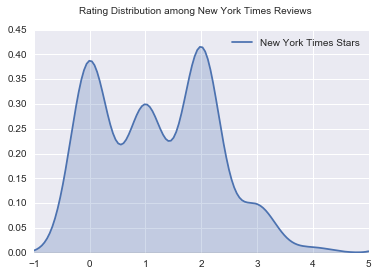

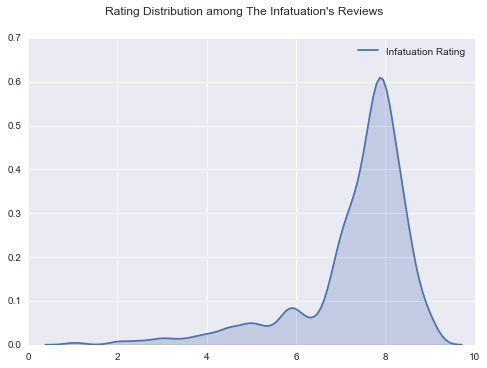

In [91]:
#Graphing Ratings 

#NYTimes's Rating Distribution
fig, ax = plt.subplots()

sns.kdeplot(Reviews["New York Times Stars"], shade=True, ax=ax)
ax.legend()

fig.suptitle("Rating Distribution among New York Times Reviews")

plt.show()

#Infatuation Rating Distribution
sns.set()

fig, ax = plt.subplots()

sns.kdeplot(Reviews["Infatuation Rating"], shade=True, ax=ax)
ax.legend()

fig.suptitle("Rating Distribution among The Infatuation's Reviews")

plt.show()

A quick look at the relationship between the two publications' review history:

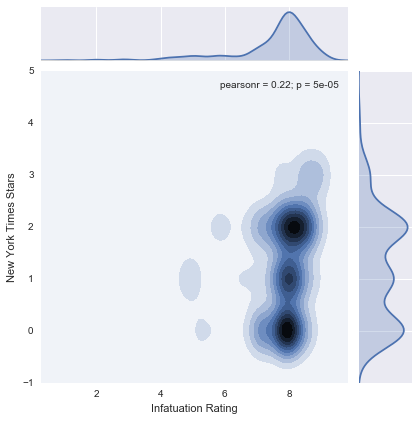

In [92]:
#Identifying the relationship between Infatuation and New York Times Reviews
sns.jointplot(x="Infatuation Rating", y='New York Times Stars', data=Reviews, kind="kde")

In general, there seems to be much less variance in Infatuation reviews relative to Times reviews. For the most part, if the Times has reviewed a restaurant, the Infatuation probably liked it. Further, while there is some relationship between higher star ratings and higher Infatuation reviews, the average zero-or-one star restaurant is likely to get about the same score as a restaurant with two or more stars. 

/Users/alex_says_please/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



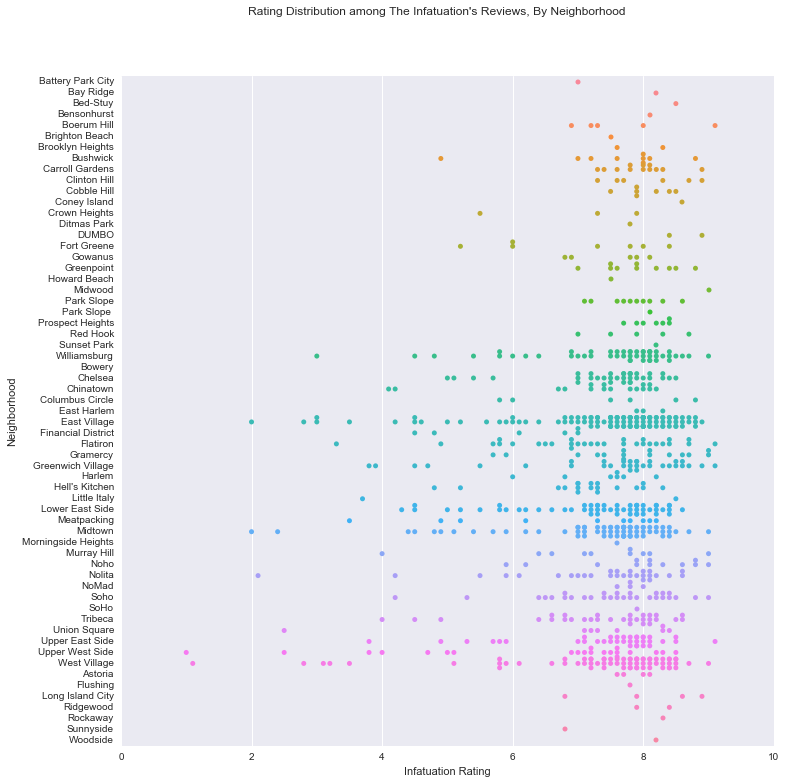

In [93]:
a4_dims = (11.7, 12)


fig, ax = plt.subplots(figsize=a4_dims)
sns.swarmplot(x="Infatuation Rating", y="Neighborhood", data=Reviews, ax=ax)
ax.legend()

fig.suptitle("Rating Distribution among The Infatuation's Reviews, By Neighborhood")

plt.show()


For the most part, negative Infatuation reviews occur in more densely-reviewed areas, but there is no evident bias in reviews in certain neighborhoods – for the most part, more restaurant-dense neighborhoods have more good and bad restaurants.

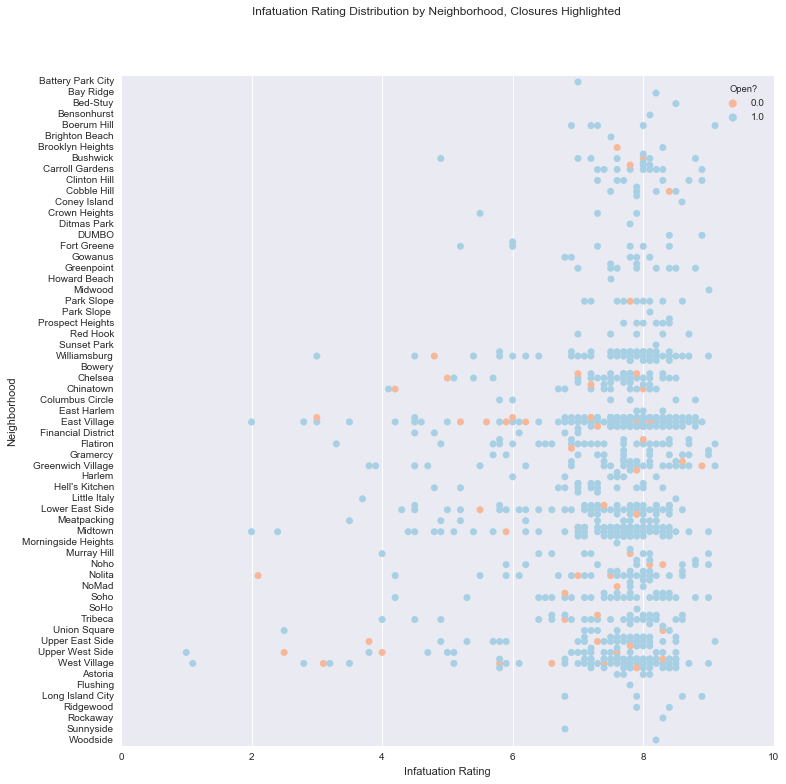

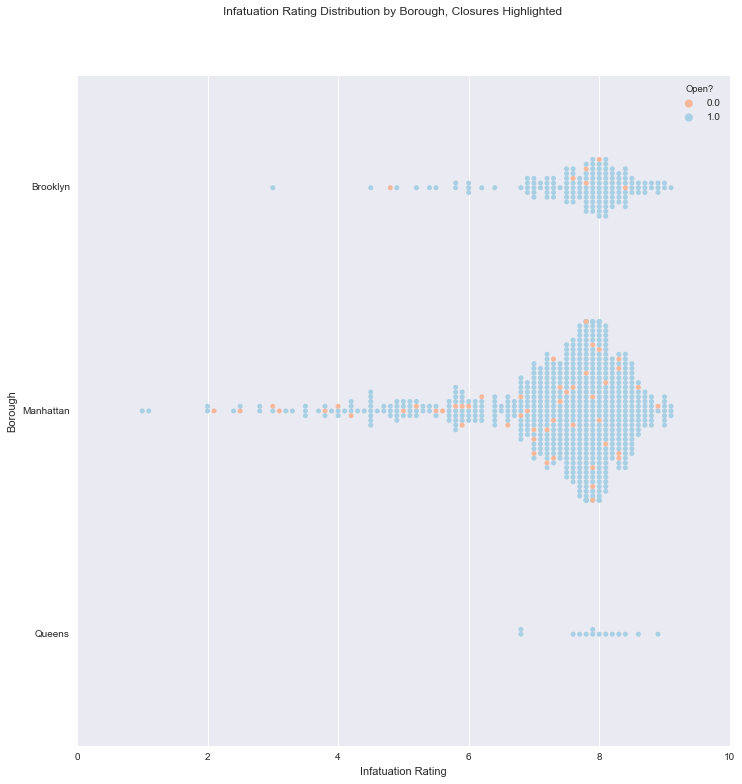

In [94]:
a4_dims = (11.7, 12)


fig, ax = plt.subplots(figsize=a4_dims)
sns.swarmplot(x="Infatuation Rating", y="Neighborhood", data=Reviews, hue = 'Open?', palette = "RdBu",
              size = 7, ax=ax)

fig.suptitle("Infatuation Rating Distribution by Neighborhood, Closures Highlighted")

plt.show()

a2_dims = (7, 9)


fig, ax = plt.subplots(figsize=a4_dims)
sns.swarmplot(x="Infatuation Rating", y='Borough', hue="Open?", data=Reviews, palette='RdBu', ax=ax)

fig.suptitle("Infatuation Rating Distribution by Borough, Closures Highlighted")

plt.show()

However, when we overlay recent closures over this distribution, there emerges a more significant relationship between reviews and open status. While there are obviously closures at every point along the rating scale, there are a disproportionately high number of closures among the worse-reviewed restaurants (in Manhattan, for example, there are 50% fewer closures among restaurants with less than a 6.0, but far fewer restaurants in that category).

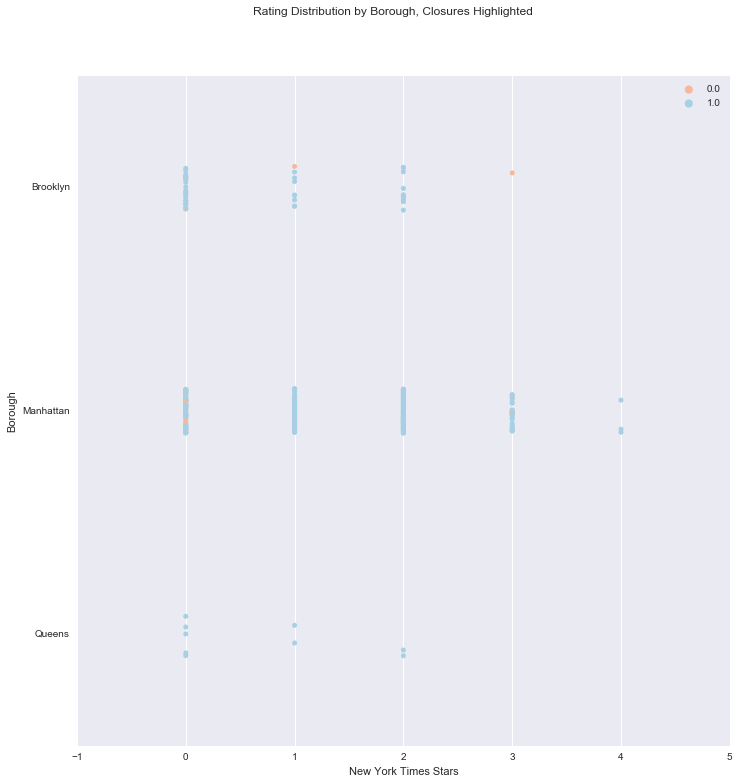

In [95]:
a4_dims = (11.7, 12)


fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x="New York Times Stars", y="Borough", data=Reviews, hue = 'Open?', palette = "RdBu",
              jitter=True, size = 5, ax=ax)
ax.legend()

fig.suptitle("Rating Distribution by Borough, Closures Highlighted")

plt.show()

While the data is somewhat difficult to perceive here, less of a pattern appears to emerge regarding NYT reviews.

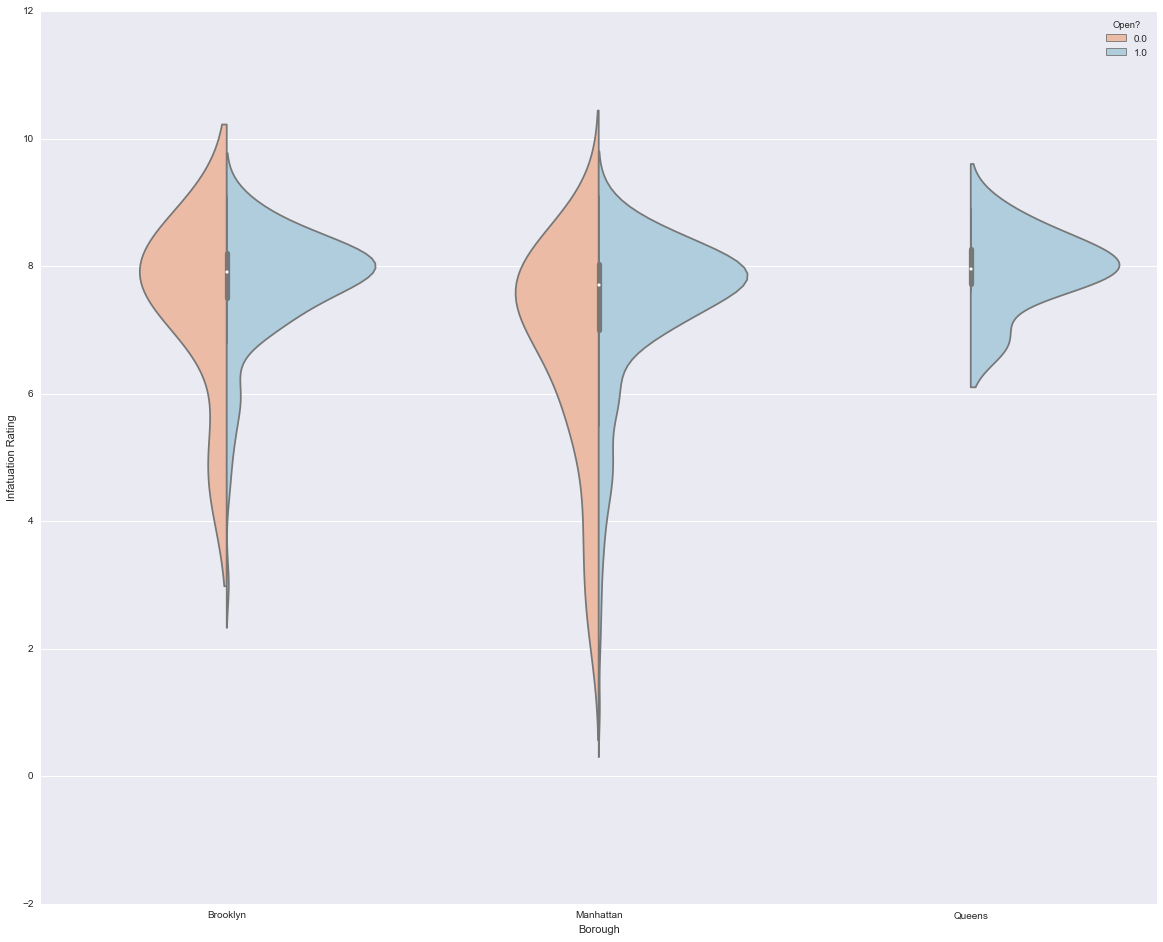

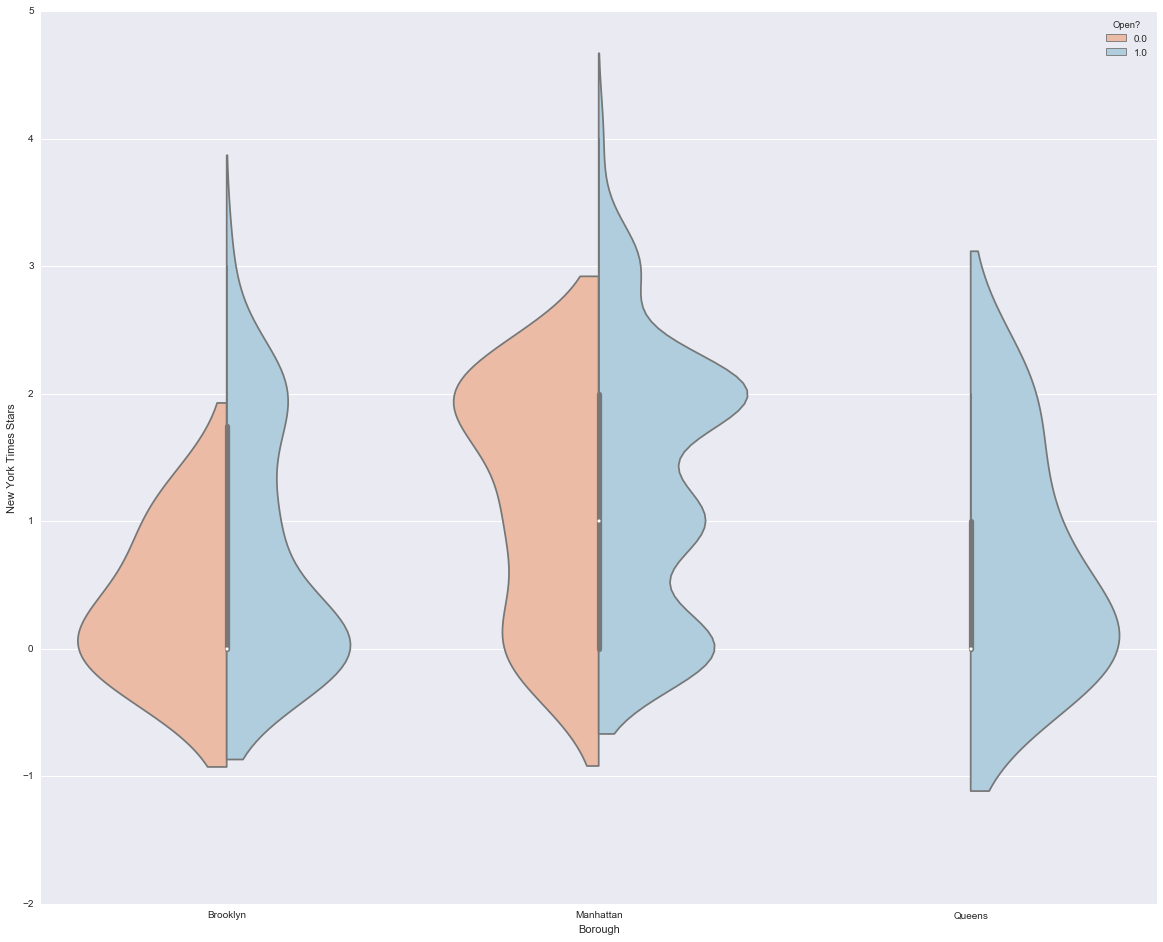

In [96]:
huge = (20, 16)
fig, ax = plt.subplots(figsize= huge)
sns.violinplot(x = 'Borough', y='Infatuation Rating', hue='Open?', data=Reviews, split=True, palette='RdBu', ax=ax)

huge = (20, 16)
fig, ax = plt.subplots(figsize= huge)
sns.violinplot(x = 'Borough', y='New York Times Stars', hue='Open?', data=Reviews, split=True, palette='RdBu', ax=ax)

Indeed, as noted by the fat red tails at the bottom of these violin distributions, worse-reviewed restaurants tend to close relatively more often than their better-reviewed counterparts. No such trend is clear with the Times’s data. 

This suggests, then, that attention from the Times’s staff is not only not enough to save a restaurant, but unless its review is over 2-stars (which is very rare), it has no relevance to the success of a restaurant.


Another consideration, then, in the question of “what makes or breaks a restaurant” is the question of location. Issues of gentrification, rising rents, and shifting demographics have dominated recent discussions of New York City life and culture, and the food culture of the city has been no exception, and there seem to be arguments that placing a restaurant in a desirable area could have either a positive or a negative effect on one’s success (positive because of a higher likelihood of traffic, negative because of the high costs).

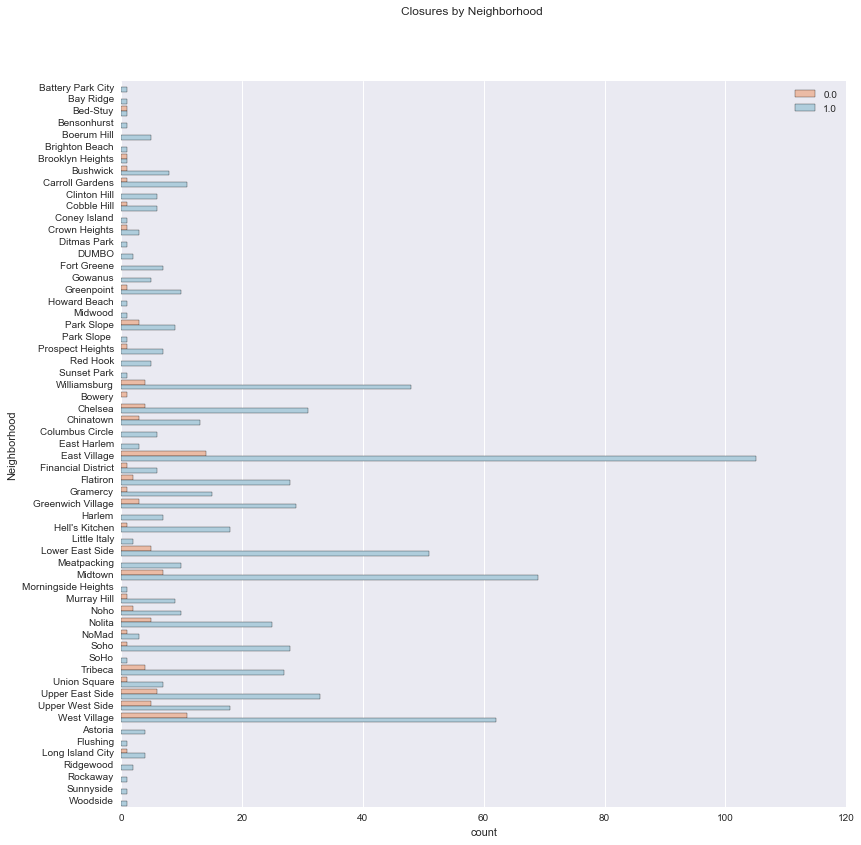

In [97]:
Effort = (13, 13)

fig, ax = plt.subplots(figsize=Effort)
sns.countplot(y="Neighborhood", hue="Open?", data=Reviews, palette="RdBu", ax=ax)
ax.legend()

fig.suptitle("Closures by Neighborhood")

plt.show()



Indeed, some relationships appear out of this data. For example, Williamsburg (in Brooklyn) and Chelsea have almost identical numbers of closures, but Williamsburg has far more reviewed restaurants. This suggests that, while prices are surely rising in that gentrifying neighbourhood, it’s still easier to keep a restaurant afloat than in a dense, expensive Manhattan neighbourhood. An interesting point of further investigation would be to index these closure rates against changes in real estate prices in these neighborhoods.  


# In conclusion, 
it’s not entirely clear what keeps a restaurant in business, but a reasonable working theory would suggest that popularity and location are significantly more important than your relationship with Pete Wells, Sam Sifton, or whomever is writing for the Times next year.

Source: Data collected by myself from The Infatuation, New York Times, and Eater, available at: https://www.dropbox.com/s/et2ygtaxhfdtzer/Infatuation_NYT_Restaurant_Reviews.xlsx?dl=0